In [6]:
import h5py
import pandas
import numpy
import os
import glob
from collections import defaultdict
import trodes.read_exported
import pandas as pd
import numpy as np
from scipy import stats
from spectral_connectivity import Multitaper, Connectivity
import logging
import h5py
import pickle
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp

In [7]:
def create_metadata_df(session_to_trodes, session_to_path):
    """

    Args:
        session_to_trodes (nested dictionary): Generated from extract_all_trodes.
        session_to_path (empty dictionary): {}
        columns_to_keep (dictionary): Provide a dictionary of the columns to keep in the metadata dataframe.

    Returns:
        trodes_metadata_df (pandas dataframe): A dataframe containing the metadata for each session.
    """

    trodes_metadata_df = pd.DataFrame.from_dict({(i, j, k, l): session_to_trodes[i][j][k][l]
                                                 for i in session_to_trodes.keys()
                                                 for j in session_to_trodes[i].keys()
                                                 for k in session_to_trodes[i][j].keys()
                                                 for l in session_to_trodes[i][j][k].keys()},
                                                orient='index')

    trodes_metadata_df = trodes_metadata_df.reset_index()
    trodes_metadata_df = trodes_metadata_df.rename(
        columns={
            'level_0': 'session_dir',
            'level_1': 'recording',
            'level_2': 'metadata_dir',
            'level_3': 'metadata_file'},
        errors="ignore")
    trodes_metadata_df["session_path"] = trodes_metadata_df["session_dir"].map(
        session_to_path)

    # Adjust data types
    trodes_metadata_df["first_dtype_name"] = trodes_metadata_df["data"].apply(
        lambda x: x.dtype.names[0])
    trodes_metadata_df["first_item_data"] = trodes_metadata_df["data"].apply(
        lambda x: x[x.dtype.names[0]])
    trodes_metadata_df["last_dtype_name"] = trodes_metadata_df["data"].apply(
        lambda x: x.dtype.names[-1])
    trodes_metadata_df["last_item_data"] = trodes_metadata_df["data"].apply(
        lambda x: x[x.dtype.names[-1]])

    ##print("unique recordings ")
    #print(trodes_metadata_df["recording"].unique())
    return trodes_metadata_df



def extract_all_trodes(input_dir):
    """
    Args:
        input_dir (String): Path containing the session directories to process.

    Returns:
        session_to_trodes_data (defaultdict): A nested dictionary containing the metadata for each session.
    """

    def recursive_dict():
        return defaultdict(recursive_dict)

    session_to_trodes_data = recursive_dict()
    session_to_path = {}

    for session in glob.glob(input_dir):
        try:
            session_basename = os.path.splitext(os.path.basename(session))[0]
            #print("Processing session: ", session_basename)
            session_to_trodes_data[session_basename] = trodes.read_exported.organize_all_trodes_export(
                session)
            session_to_path[session_basename] = session
        except Exception as e:
            print("Error processing session: ", session_basename)
            print(e)
    return session_to_trodes_data, session_to_path


In [8]:
input_dir = r"D:\cups\data\11_cups_p4.rec"

In [9]:
#data, session_dict = extract_all_trodes(input_dir)

#meta_df = create_metadata_df(data,session_dict)

In [10]:

#session = r"D:\cups\data\11_cups_p4.rec\11_cups_p4_merged.rec"

#timestamps = r"D:\cups\data\11_cups_p4.rec\11_cups_p4.1.videoTimeStamps"

In [11]:
session = r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2023\Cum_socialmemory_ephys\data\20230803_121318_1.4_3t3bL_NFC.rec"

In [12]:
trodes.read_exported.organize_all_trodes_export(session)

defaultdict(dict, {})

In [13]:
def extract_all_trodes(input_dir):
    """
    Args:
        input_dir (String): Path containing the session directories to process.

    Returns:
        session_to_trodes_data (defaultdict): A nested dictionary containing the metadata for each session.
    """

    def recursive_dict():
        return defaultdict(recursive_dict)

    session_to_trodes_data = recursive_dict()
    session_to_path = {}

    for session in glob.glob(input_dir):
        try:
            session_basename = os.path.splitext(os.path.basename(session))[0]
            print(session_basename)
            print(session)
            print("Processing session: ", session_basename)
            session_to_trodes_data[session_basename] = trodes.read_exported.organize_all_trodes_export(
                session)
            session_to_path[session_basename] = session
        except Exception as e:
            print("Error processing session: ", session_basename)
            print(e)
    return session_to_trodes_data, session_to_path


In [14]:
extract_all_trodes(r"D:\cups\data")

data
D:\cups\data
Processing session:  data
Skipping file 11_cups_p4.1.h264 due to error: 'ascii' codec can't decode byte 0xc0 in position 6: ordinal not in range(128)
Skipping file 11_cups_p4.1.videoTimeStamps due to error: 'fields'
Skipping file 11_cups_p4_merged.rec due to error: Settings format not supported
Skipping file 11_cups_p4_v2.1.trackgeometry due to error: Settings format not supported
Skipping file 11_cups_p4_v2.1_converted.mp4 due to error: 'ascii' codec can't decode byte 0x82 in position 40: ordinal not in range(128)
Skipping file 11_cups_p4_v2.rec due to error: Settings format not supported
Skipping file 11_cups_p4_v2_merged.trodesconf due to error: Settings format not supported
Skipping file logger_raw.dat due to error: 'ascii' codec can't decode byte 0xf0 in position 14: ordinal not in range(128)
Skipping file 12_cups_p4.1.h264 due to error: 'ascii' codec can't decode byte 0xc0 in position 6: ordinal not in range(128)
Skipping file 12_cups_p4.1.trackgeometry due to e

c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\trodes\read_exported.py:63: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dtype_spec)


Skipping file 21_cups_p4.1.h264 due to error: 'ascii' codec can't decode byte 0xc0 in position 6: ordinal not in range(128)
Skipping file 21_cups_p4.1.trackgeometry due to error: Settings format not supported
Skipping file 21_cups_p4.1.videoTimeStamps due to error: 'fields'
Skipping file 21_cups_p4.1_converted.mp4 due to error: 'ascii' codec can't decode byte 0xc1 in position 41: ordinal not in range(128)
Skipping file 21_cups_p4.rec due to error: Settings format not supported
Skipping file 21_cups_p4_merged.rec due to error: Settings format not supported
Skipping file 21_cups_p4_merged.trodesconf due to error: Settings format not supported
Skipping file logger_raw.dat due to error: 'ascii' codec can't decode byte 0xf0 in position 16: ordinal not in range(128)
Skipping file 22_cups_p4.1.h264 due to error: 'ascii' codec can't decode byte 0xc0 in position 6: ordinal not in range(128)
Skipping file 22_cups_p4.1.trackgeometry due to error: Settings format not supported
Skipping file 22_cup

(defaultdict(<function __main__.extract_all_trodes.<locals>.recursive_dict()>,
             {'data': defaultdict(dict,
                          {'11_cups_p4': {'rec': {'videoTimeStamps': {'clock rate': '20000',
                              'camera_name': 'HD Pro Webcam C920 (\\\\?\\usb#vid_046d&pid_082d&mi_00#6&244d82b2&0&0000#{e5323777-f976-4f5b-9b55-b94699c46e44}\\global)',
                              'fields': '<PosTimestamp uint32><HWframeCount uint32><HWTimestamp uint64>',
                              'data': array([( 1675515, 0, 0), ( 1676901, 0, 0), ( 1678287, 0, 0), ...,
                                     (53586031, 0, 0), (53586031, 0, 0), (53587417, 0, 0)],
                                    dtype=[('PosTimestamp', '<u4'), ('HWframeCount', '<u4'), ('HWTimestamp', '<u8')]),
                              'filename': '11_cups_p4_v2.1.videoTimeStamps.cameraHWSync'}}},
                           '12_cups_p4': {'rec': {'videoTimeStamps': {'clock rate': '20000',
            

In [15]:
#extract_all_trodes(r"C:\Users\megha\UFL Dropbox\Meghan Cum\Padilla-Coreano Lab\2023\Cum_socialmemory_ephys\data")

In [22]:
df = pd.read_excel(r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\channel_mapping_sme.xlsx")
spike_cols = [col for col in df.columns if 'spike_interface_' in col.lower()]

# Extract brain regions from column names
# Assumes format 'spike_interface_REGION'
brain_regions = [col.split('spike_interface_')[1] for col in spike_cols]

# Create nested dictionary
subject_dict = {}

for _, row in df.iterrows():
    subject = row['Subject']
    # Initialize inner dictionary for this subject
    subject_dict[subject] = {}
    
    # Populate inner dictionary with brain region: spike value pairs
    for col, region in zip(spike_cols, brain_regions):
        subject_dict[subject][region] = row[col]
print(subject_dict)


{1.1: {'mPFC': 19.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}, 1.2: {'mPFC': 26.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}, 1.3: {'mPFC': 9.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}, 2.1: {'mPFC': 15.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}, 2.2: {'mPFC': 7.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}, 2.3: {'mPFC': 19.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}, 2.4: {'mPFC': 10.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}, 3.1: {'mPFC': 25.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}, 3.2: {'mPFC': 26.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}, 3.3: {'mPFC': 26.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}, 4.1: {'mPFC': 25.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}, 4.4: {'mPFC': 25.0, 'vHPC': 31.0, 'BLA': 30.0, 'NAc': 28.0, 'MD': 29.0}}


In [24]:

TRODES_STREAM_ID="trodes"
RECORDING_EXTENTION="*merged.rec"
           

LFP_FREQ_MIN=0.5
LFP_FREQ_MAX=300
ELECTRIC_NOISE_FREQ=60
LFP_SAMPLING_RATE=1000
EPHYS_SAMPLING_RATE=20000
start_frame = 500
stop_frame = 3000
recording_path = r"D:\cups\data\11_cups_p4.rec\11_cups_p4_merged.rec"


current_recording = se.read_spikegadgets(
    recording_path, stream_id=TRODES_STREAM_ID)
#print(recording_basename)
# # Preprocessing the LFP
current_recording = sp.notch_filter(
    current_recording, freq=ELECTRIC_NOISE_FREQ)
current_recording = sp.bandpass_filter(
    current_recording, freq_min=LFP_FREQ_MIN, freq_max=LFP_FREQ_MAX)
current_recording = sp.resample(
    current_recording, resample_rate=LFP_SAMPLING_RATE)

In [31]:
traces = current_recording.get_traces(start_frame=start_frame, end_frame=stop_frame).T
np.savetxt(r'tests\test_data\test_traces.csv', traces, delimiter=',')

In [32]:
traces.shape

(32, 2500)

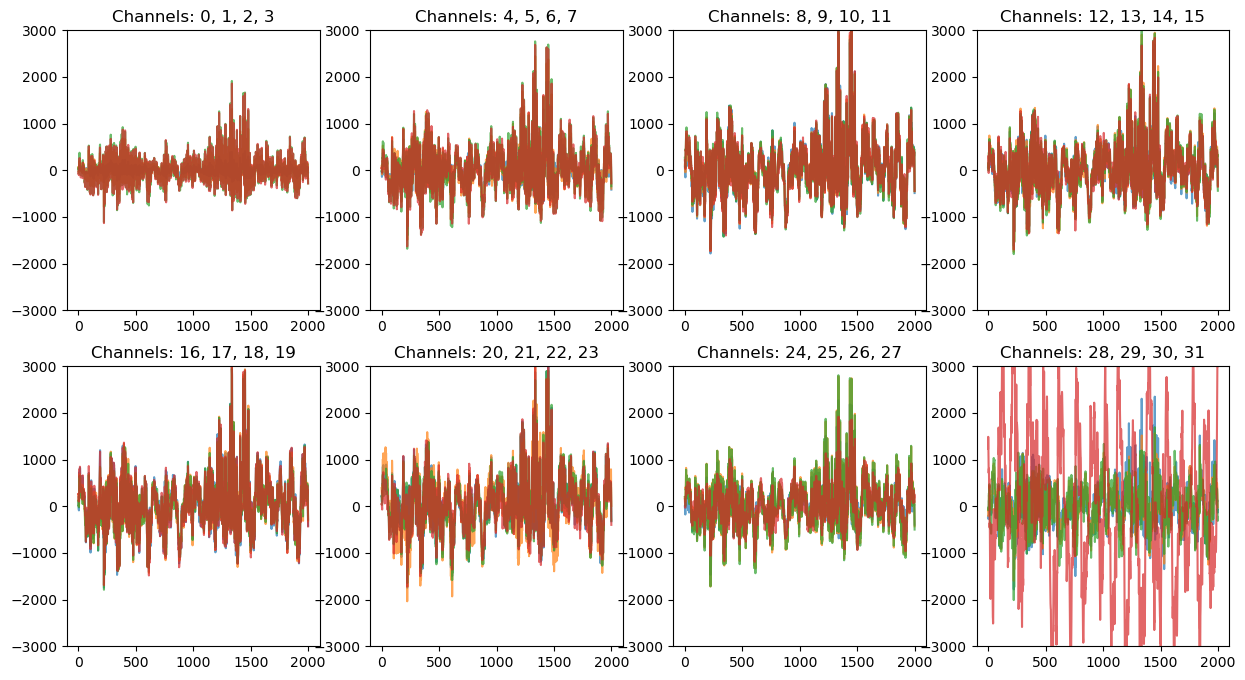

In [27]:
channel_groups = 4  # Assuming you have 8 channels per group
plot_count = 0  # Counter to keep track of how many plots are in the current subplot
duration = 2000
#from labellines import labelLine, labelLines
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for num in range(traces.shape[0]// channel_groups):
      # Create the figure and 8 subplots (2x4)
    max_value = np.nanmax(traces)
    min_value = np.nanmin(traces)
    trimmed_traces = traces[:,:duration]
    if max_value >= 3000:
        max_value = 3000
    if min_value <= -3000:
        min_value = -3000
    all_channels = []
    ax = axs[num // 4, num % 4]  # Select the appropriate subplot

    for channel_displacement in range(channel_groups):
        current_ch = int(num * channel_groups + channel_displacement)
        trace = trimmed_traces[current_ch,:]
        ax.plot(trace, label=current_ch, alpha=0.7)  # Plot the trace
        all_channels.append(str(current_ch))
    ax.set_title("Channels: " + ", ".join(all_channels))
    #labelLines(ax.get_lines(), zorder=2.5)
    ax.set_ylim(min_value, max_value)  # Set a title for each subplot
plt.show()

In [28]:
traces.shape

(32, 2500)